# Project MINIMAL VOLUME ELLIPSOID

## BEKKOUCH Imad Eddine Ibrahim
### Optimisation, fall 2018
#### Innopolis University, Data Science Masters Program

# 1. Subroutine problem
Given N points on the plane. Find minimal volume ellipsoid containing these points. This is
the convex problem:
$$ min log det A^{-1}$$

$$||Ax^i +b||^2_2 <= 1, i=1,...,N$$

The volume of the ellipsoid is proportional to $det A^{-1}$


## 1.1 Helper Functions and imports

In [1]:
# imports of needed libraries
import numpy as np
import cvxpy as cvp
import cvxopt
import matplotlib.pyplot as plt
import cvxopt.lapack as lp
from matplotlib.patches import Ellipse
from itertools import combinations
import math
%matplotlib inline 

In [2]:
# just a function for plotting the ellipsoid and the Xs
def show_ellipse(X,fig,ax, A, b, color,show_plot,k=None,scatter_colot='red'):
    if k is None:
        k = len(X)
    sigma = np.linalg.inv(A.T.dot(A))
    mu = -sigma.dot(A.T).dot(b)
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)
    ellipse = Ellipse(mu, w, h, theta, color=color)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.scatter(X.T[0], X.T[1], color=scatter_colot)
    plt.grid(color='lightgray', linestyle='--')
    if show_plot:
        plt.title("k: "+str(k)+" count:"+str(count))
        plt.show()

## 1.2 The solution 
We define n, m the dimensions of our X, and A, b cvp variables that define our ellipsoid.
``` python
n, m = x.shape
A = cvp.Variable((m, m), PSD=True)
b = cvp.Variable((m))
```
and since our function to minimize is the following:
$$minlog det A^{-1}$$
``` python
obj_s = cvp.Minimize(-cvp.log_det(A))
```
Our contraints are a list of constraints for each x to be inside the ellipsoid:
$$||Ax^i +b||^2_2 <= 1, i=1,...,N$$
``` python
constraints_s = [cvp.norm((x * A)[i] + b) <= 1 for i in np.arange(0,n,1)]
```
and finally we just solve the problem if the solution exists:
``` python
try:
    prob.solve(solver=cvp.CVXOPT)
except:
    return None,None,np.inf
return A.value,b.value,prob.value
```

Some extra pieces of code for plotting and getting the number of calls to the function (useful in the second part):
``` python
global count
count+=1
print("number of calls to the solve",count)


if plot:    
    show_ellipse(x,fig,ax, A.value, b.value, color,show_plot)
```

In [3]:
# the solution
def solve(x,fig, ax,plot=True,show_plot=True,color="b"):
    global count
    count+=1
#     print("number of calls to the solve",count)
    n, m = x.shape
    A = cvp.Variable((m, m), PSD=True)
    b = cvp.Variable((m))
    constraints_s = [cvp.norm((x * A)[i] + b) <= 1 for i in np.arange(0,n,1)]

    # min trace
    obj_s = cvp.Minimize(-cvp.log_det(A))
    prob = cvp.Problem(obj_s, constraints_s)
    try:
        prob.solve(solver=cvp.CVXOPT)
    except:
        return None,None,np.inf
    if plot:    
        show_ellipse(x,fig,ax, A.value, b.value, color,show_plot)
    return A.value,b.value,prob.value

## 1.2 Exectution
We will run it against different types of data to see it working.

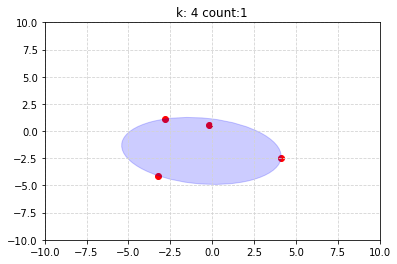

0


In [4]:
distrution = 10
n, m = 4,2
count = 0
x = np.random.rand(n,m)*distrution-5
fig, ax= plt.subplots()
A,b,cost = solve(x,fig, ax)
print(np.argmin([np.linalg.norm(A.dot(x[i]) + b,2) for i in np.arange(0,n,1)]))

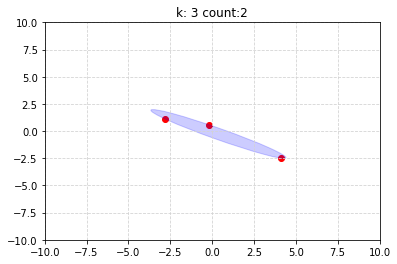

[0.999999996252728, 0.999999996249965, 0.9999999962476147, 10.568830631643033]


In [5]:
fig, ax= plt.subplots()
A,b,cost = solve(x[:-1],fig, ax)
print([np.linalg.norm(A.dot(x[i]) + b,2) for i in np.arange(0,n,1)])

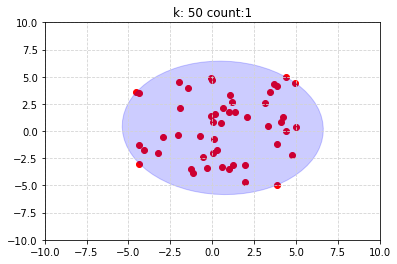

(array([[0.16657848, 0.00219672],
        [0.00219672, 0.16299677]]),
 array([-0.10677097, -0.04975743]),
 3.6064913932063245)

In [6]:
distrution = 10
n, m = 50,2
count = 0
x = np.random.rand(n,m)*distrution-5
fig, ax= plt.subplots()
solve(x,fig, ax)

Now we will try it for X points in $\mathcal{R^5}$, and since we can't plot it we will just verify the constraints for all the points.

In [7]:
distrution = 10
n, m = 10,5
x = np.random.rand(n,m)*distrution-10
count = 0
A, b, cost = solve(x,None, None,plot=False,show_plot=False)

print([np.linalg.norm(A.dot(x[i]) + b,2) for i in np.arange(0,n,1)])

[0.9999999999945787, 0.9999999999907552, 0.9901725907129627, 0.9999999999952991, 0.9999999999918403, 0.9999999999932909, 0.9999999999937955, 0.7869290280205298, 0.9999999999940615, 0.9999999999907472]


# 2. Major task
Given $\mathcal{N}$ points in $\mathcal{R^n}$, Select k of them such that the volume of ellipsoid covering these particular
selected $\mathcal{k}$ points is minimal (compare to other ellipsoids covering different subsets of $\mathcal{k}$ points of $\mathcal{N}$).


The requirement for computational budget: the number of subroutine (calculation of minimal
volume ellipsoid containing given m points) runs must not exceed $B$.
You are expected to provide the detailed description of the algorithm, description of test data
set and results for this data. Then your algorithm will be tested on additional data sets.
Consider two cases:
1. $n = 2, N = 20, k = 5, B = 6060$
2. $n = 5, N = 20, k = 10, B = 9999$


## 2.1 Wrong Answer 1 (Iterative)
Here we will prove that any iterative answer will not be able to generate the global minimum, and we will write the first draft of our code, it will make explanation much easier.

For that we need :
1. naive brute force algorithm to go through all posible combinations(the basis of our final algorithm).
2. Example data set.
3. Prove the problem
4. Property of MVE

### 2.1.1 Naive Brute Force
We will use an algorithm that goes through all the combinations and find the min.
1. Generate all combinations:
``` python
combi = combinations(range(len(x)), k)
```
we will generate all combinations of the indexes of points $\mathcal{C}^N_k$
2. solve the MVE for each combination:
```python
for a in combi:
A,b,cost = solve(x[a],fig, ax,plot=False,show_plot=False)
```
3. find the minimum:
```python
min_cost = np.inf
best_combination = []
for a in combi:
     if cost < min_cost:
         min_cost = cost
         best_combination = a
```
4. some plotting and progress code
```python
progress = 0
nb_cominations = math.factorial(len(x)) / math.factorial(k) / math.factorial((len(x) - k))
print(str(round(progress / nb_cominations*100))+"%")
progress += 1
A,b,cost = solve(x,fig, ax,plot=True,show_plot=False)
A,b,cost = solve(x[bbb],fig, ax,color="r")
```

In [8]:
def naive_brute_force(x, n, m, k):
    min_cost = np.inf
    best_combination = []
    progress = 0
    nb_cominations = math.factorial(len(x)) / math.factorial(k) / math.factorial((len(x) - k))
    combi = combinations(range(len(x)), k)
    fig, ax= plt.subplots()
    for a in combi:
        a = np.array(a)
        print(str(round(progress / nb_cominations*100))+"%")
        progress += 1
        A,b,cost = solve(x[a],fig, ax,plot=False,show_plot=False)
        if cost != np.inf:
            if cost < min_cost:
                min_cost = cost
                best_combination = a
    # two extra calls for solve to help for plotting 
    A,b,cost = solve(x,fig, ax,plot=True,show_plot=False)
    A,b,cost = solve(x[best_combination],fig, ax,color="r")
    return A,b,cost,best_combination

### 2.1.2 Examle Data
We want to see that the iterative solutions don't work, so we will see that the k best points don't give you the best k+1 points and vice versa.
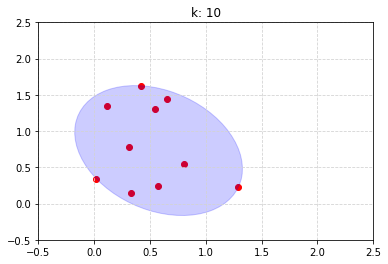



### 2.1.3 Prove the problem
As we can see that the set that gave us the best points for k=6 is not included in the set that gave k = 7
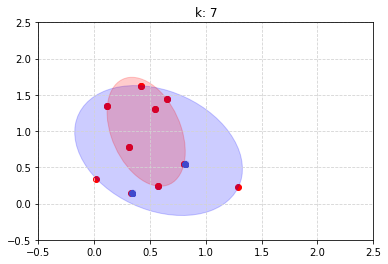
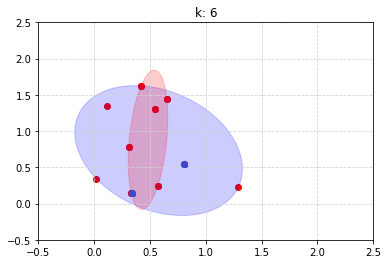

### 2.1.4 Property of MVE
#### 1. boundry property
We have seen that the best points for k+1 don't give you the best poits for k, but we can see that each ellipsoid is defined by only a subset of the points it has, and these points are the ones on the boundry.
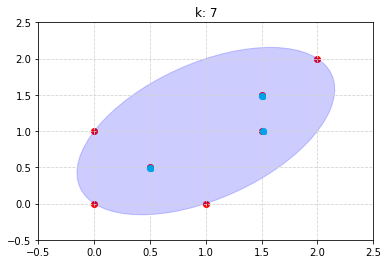

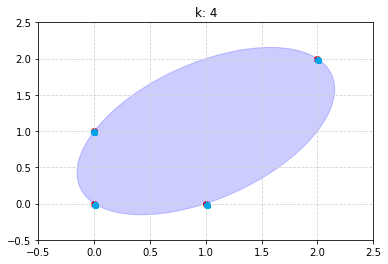

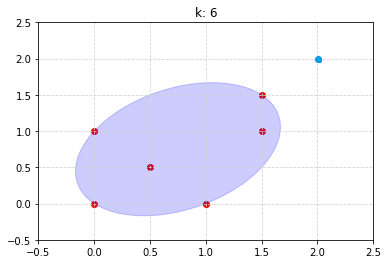

1. if we delete one of the boundry points, the MVE will be smaller.
2. if you keep them with any combination of insider points, the MVE will not change.
3. if you keep them with any combination of outer points, the MVE will only increase.

from these two properties we will generate our final solution:

We do a brute force but at each time we take the points at the boundry and if we find them in any future combiantion we don't calculate the MVE for it.
#### 2. Convex Hull property
this one is easier than the first one, we build the convex hull from our a combination and test if any of the other non a set is inside the convex hull.
If yes we don't need to calculate this combiantion because we know for sure that there is an insider combiantion that is minimum to this one.


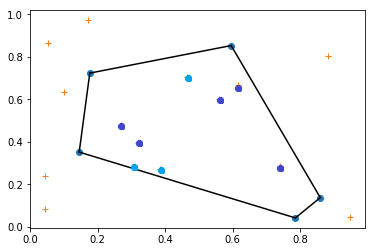


## 2.2 Final Solution
Since any iterative solution will not work. we can only check combinatorial solutions, but with the previous property we can safely disregard a huge number of combinations.

So we will do a brute force with elimination of safe combinations.

1. same code as the naive_brute force algorithm
2. create a list for bad boundry combinations{list of sets}
```python
constraints = []
for a in combi:
     constraints.append(set(a[np.argwhere([np.linalg.norm(A.dot(x[i]) + b,2)>=.99999 for i in a]).flatten()]))
```
3. if it was never calculated before, then we use Convex hull, if it has more points from the rest inside then we don't calculate.

```python
def in_hull(p, hull):
    from scipy.spatial import Delaunay
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0
```
4. only calculate MVE if the new combination is valuable
```python
seta = set(a)
valuable = True
for constraint in constraints:
     if len(constraint - seta)==0:
         valuable= False
         break
if valuable:
```

array([False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False])

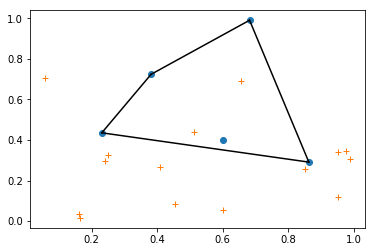

In [9]:
from scipy.spatial import ConvexHull
def in_hull(p, hull):
    from scipy.spatial import Delaunay
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0
tested = np.random.rand(15,2)
cloud  = np.random.rand(5,2)

hull = ConvexHull(cloud)

import matplotlib.pyplot as plt
plt.plot(cloud[:,0], cloud[:,1], 'o')
import matplotlib
plt.plot(tested[:,0], tested[:,1], '+')
for simplex in hull.simplices:
    plt.plot(cloud[simplex, 0], cloud[simplex, 1], 'k-')

    
in_hull(tested, cloud)

In [10]:
# Helper function for seeing the progress
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

def in_hull(p, hull):
    from scipy.spatial import Delaunay
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0

def brute_force(x, n, m, k):
    min_cost = np.inf
    best_combination = []
    progress = 0
    constraints = []
    nb_cominations = nCr(n,k)
    combi = combinations(range(len(x)), k)
    if m == 2:
        fig, ax= plt.subplots()
    else:
        fig, ax= None,None
    for a in combi:
#         progress += 1
        seta = set(a)
        valuable = True
        a = np.array(a)
        not_a = np.setdiff1d(np.arange(0,len(x),1),a)
        if np.any(in_hull(x[not_a], x[a])):
#             print('skip reason one')
            continue
        for constraint in constraints:
            if len(constraint - seta)==0:
                valuable= False
#                 print('skip reason twi')
                break
        if valuable:
#             print(str(round(progress / nb_cominations*100,2))+"%")
            A,b,cost = solve(x[a],fig, ax,plot=False,show_plot=False)
            if cost != np.inf:
                constraints.append(set(a[np.argwhere([np.linalg.norm(A.dot(x[i]) + b,2)>=.99999 for i in a]).flatten()]))
                if cost < min_cost:
                        min_cost = cost
                        best_combination = a
    if m == 2:
        A,b,cost = solve(x,fig, ax,plot=True,show_plot=False)
        A,b,cost = solve(x[best_combination],fig, ax,color="r",plot=True,show_plot=True)
    return A,b,cost

### 2.3 test cases
1. n = 2:
    * Normal case 1: $N = 20, k = 16, B = 100$
    * Normal case 2: $N = 20, k = 4, B = 1000$
    * Normal case 3: $N = 20, k = 19, B = 10$
    * Normal case 4: $N = 20, k = 18, B = 20$
    * Normal case 5: $N = 20, k = 17, B = 50$
    * Normal case 5: $N = 20, k = 5, B = 6060$
    * Extrele case: best combo contains the parts of the extremes
2. n = 5:
    * Normal case $N = 20, k = 10, B = 9999$


In [11]:
import pandas as pd
X1 = pd.read_csv('datasets/set1.csv', header=None).values
X2 = pd.read_csv('datasets/set2.csv', header=None).values
X3 = pd.read_csv('datasets/set3.csv', header=None).values
X4 = pd.read_csv('datasets/set4.csv', header=None).values
X5 = pd.read_csv('datasets/set5.csv', header=None).values
k = 5

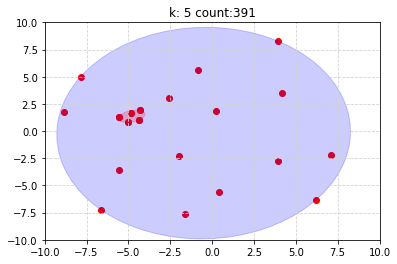

cost -0.8634206938887998
--- 66.18474197387695 seconds ---
we calculated only 391 insted of 15504.0


In [12]:
count = -2
import time
start_time = time.time()
A,b,cost = brute_force(X1, X1.shape[0], X1.shape[1], 5)
print('cost',cost)
print("--- %s seconds ---" % (time.time() - start_time))
print("we calculated only",count,"insted of",nCr(20,k))

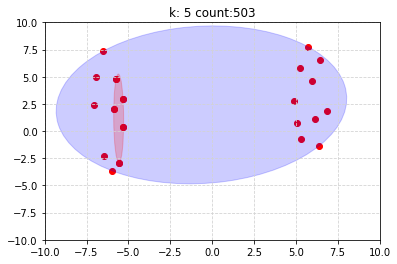

cost 0.19002399123032387
--- 81.5241186618805 seconds ---
we calculated only 503 insted of 15504.0


In [13]:
count = -2
import time
start_time = time.time()
A,b,cost = brute_force(X2, X2.shape[0], X2.shape[1], 5)
print('cost',cost)
print("--- %s seconds ---" % (time.time() - start_time))
print("we calculated only",count,"insted of",nCr(20,k))

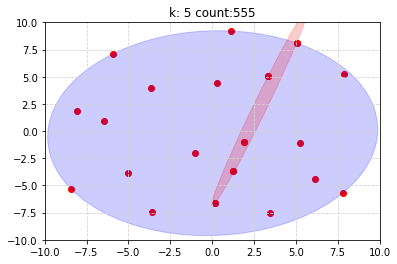

--- 85.04214715957642 seconds ---
cost 1.37479641672107
we calculated only 555 insted of 15504.0


In [14]:
count = -2
import time
start_time = time.time()
A,b,cost = brute_force(X3, X3.shape[0], X3.shape[1], 5)
print("--- %s seconds ---" % (time.time() - start_time))
print('cost',cost)
print("we calculated only",count,"insted of",nCr(20,k))

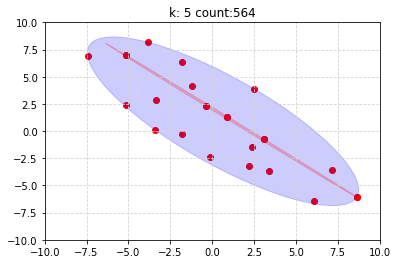

--- 84.17820835113525 seconds ---
cost 0.010952045310539393
we calculated only 564 insted of 15504.0


In [15]:
count = -2
import time
start_time = time.time()
A,b,cost = brute_force(X4, X4.shape[0], X4.shape[1], 5)
print("--- %s seconds ---" % (time.time() - start_time))
print('cost',cost)
print("we calculated only",count,"insted of",nCr(20,k))

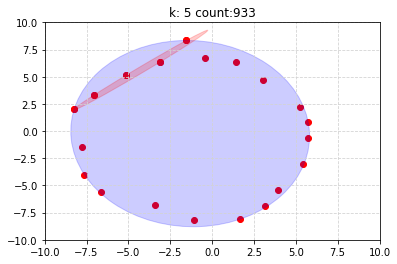

--- 132.93266224861145 seconds ---
cost 0.2928019754742328
we calculated only 933 insted of 15504.0


In [16]:
count = -2
import time
start_time = time.time()
A,b,cost = brute_force(X5, X5.shape[0], X5.shape[1], 5)
print("--- %s seconds ---" % (time.time() - start_time))
print('cost',cost)
print("we calculated only",count,"insted of",nCr(20,k))